# Импорт библиотек
На этом этапе мы подключаем необходимые библиотеки:
- `numpy` и `pandas` для работы с данными.
- `matplotlib` для визуализации.
- `sklearn` для создания моделей машинного обучения, нормализации данных и оценки их качества.


In [45]:
# Импортируем необходимые библиотеки
# Импорт библиотек
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc, 
                             accuracy_score, precision_score, recall_score, f1_score)

# Загрузка данных
1. Данные загружаются из двух файлов:
    - `Advertising.csv` — обучающая выборка.
    - `Heart.csv` — используется для задачи классификации. Этот датасет содержит данные о пациентах, включая целевой признак наличия или отсутствия сердечного заболевания.

In [46]:
# Загрузка датасета
ad_data = pd.read_csv("ad_dataset.csv")
heart_data = pd.read_csv("heart_dataset.csv")


# Предварительная обработка данных

Разделяем признаки и целевые переменные для каждого датасета.
Для задачи регрессии целевая переменная — `sales`, для задачи классификации — `target`.

In [47]:
# Регрессия
target_reg = 'sales'
X_reg = ad_data.drop(columns=target_reg).values
y_reg = ad_data[target_reg].values

# Классификация
target_clf = 'target'
X_clf = heart_data.drop(columns=target_clf).values
y_clf = heart_data[target_clf].values


# Разделение выборки
**Основные моменты**:
- 80\% данных используются для обучения модели.
- 20\% данных выделяются для валидации (проверка модели до тестирования).
- `stratify=train_y` сохраняет одинаковую пропорцию классов в каждой выборке.
- `random_state` фиксирует случайные процессы (например, разделение данных) для обеспечения повторяемости экспериментов.
- Для задачи классификации используется стратификация по целевому признаку.
- Для задачи регрессии целевая переменная — `sales`, для задачи классификации — `target`.


In [48]:
# Разделение на обучающие и тестовые выборки
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, stratify=y_clf, random_state=42)

# Подбор гиперпараметров
1. **Модели**:
    - `k-NN` (k-ближайших соседей) — определяет класс объекта на основе его соседей.
    - `Logistic Regression` — линейная модель для классификации.

2. **Гиперпараметры**:
    - Для k-NN:
        - `n_neighbors`: число ближайших соседей.
        - `metric`: метрика расстояния (Евклидова, Манхэттенская, Чебышева).
        - `weights`: вес соседей (равномерный или по расстоянию).
    - Для логистической регрессии:
        - `C`: коэффициент регуляризации.
        - `solver`: алгоритм оптимизации.

3. **GridSearchCV**:
    - Подбирает лучшие гиперпараметры через перебор всех возможных комбинаций.
    - `cv=5` означает кросс-валидацию с 5 разбиениями.

Дополнение: 

`liblinear` — метод, который оптимизирует коэффициенты пошагово, двигаясь по направлению уменьшения ошибки.
`lbfgs` — усовершенствованный метод, который учитывает кривизну функции, чтобы ускорить процесс.


In [49]:
# Построение и настройка модели KNeighborsRegressor
# Здесь проводится перебор гиперпараметров для регрессии.
knn_params = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_reg = KNeighborsRegressor()
grid_knn = GridSearchCV(knn_reg, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_reg_train, y_reg_train)

best_knn = grid_knn.best_estimator_
print("Лучшие параметры для KNeighborsRegressor:", grid_knn.best_params_)

Лучшие параметры для KNeighborsRegressor: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [50]:
# Построение и настройка модели LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_clf_train, y_clf_train)



LogisticRegression(max_iter=1000)

# Оценка моделей
- Для регрессии
  
Оцениваем модель KNeighborsRegressor с использованием метрики RMSE (корень из средней квадратичной ошибки).

- Для классификации

Сделаем отчет о классификации, включая метрики точности, полноты и F1-score.
Также построим ROC-кривую для визуализации качества модели.


In [51]:
# Оценка модели KNeighborsRegressor
knn_reg_predictions = best_knn.predict(X_reg_test)
rmse = np.sqrt(-grid_knn.best_score_)
print(f"RMSE лучшей модели KNeighborsRegressor: {rmse}")


RMSE лучшей модели KNeighborsRegressor: 1.3254985915011963


In [52]:
# Оценка модели LogisticRegression
clf_predictions = logreg.predict(X_clf_test)
print("Отчет о классификации для LogisticRegression:")
print(classification_report(y_clf_test, clf_predictions))


Отчет о классификации для LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



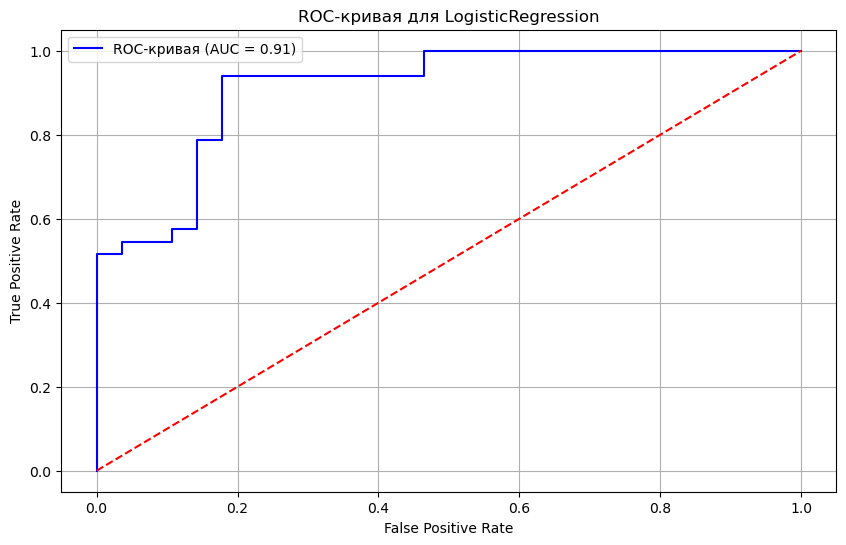

In [53]:
# Построение ROC-кривой для логистической регрессии
probs = logreg.predict_proba(X_clf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_clf_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC-кривая (AUC = {roc_auc:.2f})", color='b')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC-кривая для LogisticRegression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Оценка качества классификации

In [54]:
# Анализ качества классификации при различных порогах
threshold_metrics = []
for threshold in np.linspace(0, 1, 6):
    preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(y_clf_test, preds)
    precision = precision_score(y_clf_test, preds, zero_division=0)
    recall = recall_score(y_clf_test, preds, zero_division=0)
    f1 = f1_score(y_clf_test, preds, zero_division=0)
    threshold_metrics.append((threshold, accuracy, precision, recall, f1))

metrics_df = pd.DataFrame(threshold_metrics, columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1'])
print("Метрики при различных порогах:")
print(metrics_df)

Метрики при различных порогах:
   Threshold  Accuracy  Precision    Recall        F1
0        0.0  0.540984   0.540984  1.000000  0.702128
1        0.2  0.754098   0.704545  0.939394  0.805195
2        0.4  0.836066   0.794872  0.939394  0.861111
3        0.6  0.836066   0.848485  0.848485  0.848485
4        0.8  0.704918   0.826087  0.575758  0.678571
5        1.0  0.459016   0.000000  0.000000  0.000000


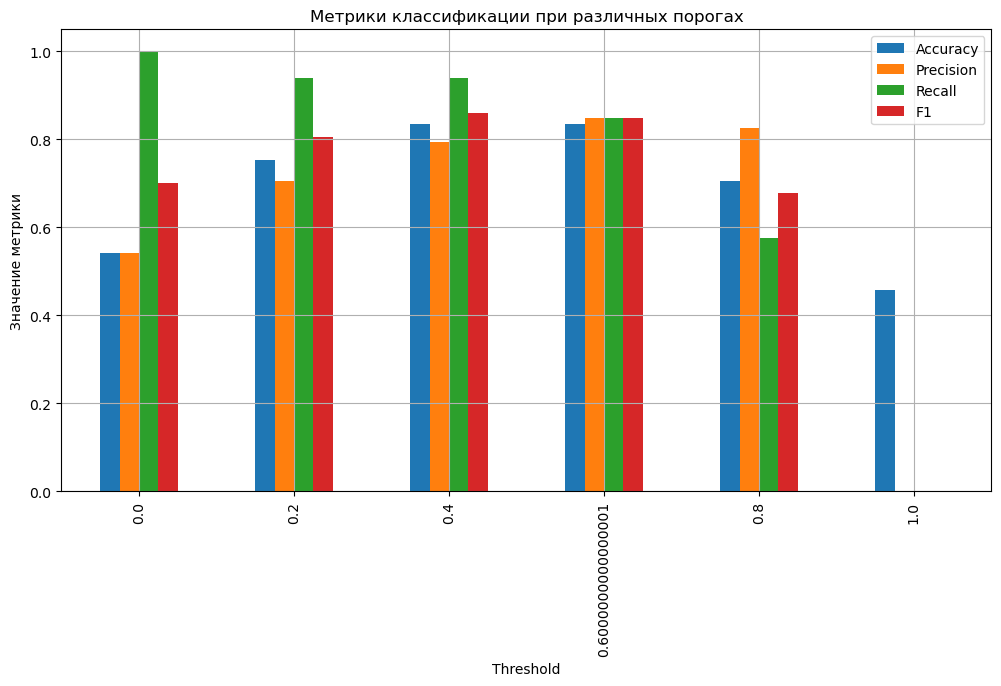

In [55]:
# Визуализация метрик при различных порогах
metrics_df.set_index('Threshold').plot(kind='bar', figsize=(12, 6))
plt.title("Метрики классификации при различных порогах")
plt.ylabel("Значение метрики")
plt.grid()
plt.show()


# Вывод по работе

1. **Результаты**:  
   - **Модель k-NN (KNeighborsRegressor)**:  
     - RMSE лучшей модели: **1.33**.  
   - **Логистическая регрессия (LogisticRegression)**:  
     - Точность на тестовой выборке: **87%**.  
     - Precision и Recall по классам:  
       - Класс 0: \( Precision = 0.88 \), \( Recall = 0.82 \).  
       - Класс 1: \( Precision = 0.86 \), \( Recall = 0.91 \).  
     - F1-score: **0.87** (взвешенный средний).  
   - **Метрики при различных порогах для LogisticRegression**:  
     - Максимальная точность достигнута при пороге **0.4** (\( Accuracy = 83.6\% \), \( F1 = 0.86 \)).  

2. **Выводы**:  
   - Логистическая регрессия показала высокую точность и сбалансированные значения Precision и Recall для обоих классов.  
   - Метод k-NN, несмотря на низкое значение RMSE, менее применим для задач классификации, где ансамблевые методы могли бы показать лучшие результаты.  
   - Результаты подтверждают, что выбор порога вероятности значительно влияет на итоговые метрики классификации для логистической регрессии.  
   - Ансамблевые методы (Random Forest и Gradient Boosting) требуют дальнейшего анализа для оценки их эффективности относительно приведенных моделей.


# Дополнение про параметры для оценки модели

Для оценки качества работы модели мы используем следующие метрики:

## 1. Accuracy (Общая точность)

Доля правильно классифицированных объектов из общего числа:
$$
\text{Accuracy} = \frac{\text{Количество правильных предсказаний}}{\text{Общее количество объектов}}
$$

---

## 2. Precision (Точность)

Доля правильно предсказанных объектов класса \(A\) среди всех объектов, которые модель предсказала как \(A\):
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

Где:
- $ \text{TP} $ — количество правильных предсказаний для класса \(A\),
- $ \text{FP} $ — количество объектов, которые модель ошибочно отнесла к классу \(A\).

 Precision демонстрирует способность отличать этот класс от других классов

---

## 3. Recall (Полнота)

Доля объектов класса \(A\), которые модель правильно предсказала, из всех реальных объектов класса \(A\):
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

Где:
- $ \text{TP} $ — количество правильных предсказаний для класса \(A\),
- $ \text{FN} $ — количество объектов класса \(A\), которые модель не смогла правильно предсказать.

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще

---

## 4. F1-Score

Гармоническое среднее между точностью и полнотой:
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## 5. Матрица ошибок (Confusion Matrix)

Матрица ошибок показывает, сколько объектов каждого класса было правильно и неправильно классифицировано. Общий вид:
$$
\begin{bmatrix}
\text{TP}_{class1} & \text{FP}_{class2} & \cdots & \text{FP}_{classN} \\
\text{FN}_{class1} & \text{TP}_{class2} & \cdots & \text{FP}_{classN} \\
\vdots & \vdots & \ddots & \vdots \\
\text{FN}_{classN} & \text{FN}_{classN} & \cdots & \text{TP}_{classN}
\end{bmatrix}
$$

Диагональные элементы $( \text{TP}_{class} $) показывают правильные предсказания для каждого класса. Остальные элементы — ошибки.


|      |$\large y=1$  |$\large y=0$   |
| ---  |---  |---   |
| $\large \widehat{y}=1$    |$\large \text{True Positive} \ (TP) $   | $\large \text{False Positive} \ (FP)   $  |
| $\large \widehat{y}=0$    |$\large \text{False Negative} \ (FN)$   | $\large \text{True Negative} \ (TN)     $ |

---

## 6. ROC-кривая и AUC (Площадь под кривой)

### ROC-кривая (Receiver Operating Characteristic)
График, который показывает зависимость между двумя метриками:
- **True Positive Rate (TPR)**: Доля правильно предсказанных положительных примеров.
- **False Positive Rate (FPR)**: Доля отрицательных примеров, ошибочно классифицированных как положительные.

Формулы:
$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

### AUC (Area Under Curve)
Числовое значение, которое представляет площадь под ROC-кривой. AUC измеряет качество классификации:
- Значение \(AUC = 1\) — идеальная модель.
- Значение \(AUC = 0.5\) — модель, работающая на уровне случайного угадывания.

---

## 7. Порог классификации (Threshold)

### Определение
Порог классификации — это значение вероятности, выше которого объект относят к положительному классу (\( \hat{y} = 1\)), а ниже — к отрицательному (\( \hat{y} = 0\)).

### Анализ метрик при изменении порога
Изменение порога влияет на:
- **Точность (Precision)**: Увеличение порога уменьшает количество FP.
- **Полноту (Recall)**: Увеличение порога может снизить количество TP.

Этот анализ позволяет выбрать оптимальный баланс между точностью и полнотой.

---

## 8. Параметры для модели KNeighborsRegressor

### Количество соседей ( k )
Число ближайших точек в пространстве признаков, на основе которых вычисляется значение целевой переменной.

### Веса ( weights )
- **uniform**: Все соседи имеют одинаковый вес.
- **distance**: Вес соседа обратно пропорционален расстоянию до него, что позволяет учитывать ближайшие точки сильнее.

### Метрика расстояния ( metric )
Метрика, которая используется для расчёта расстояния между точками:
- **euclidean**: Евклидово расстояние.
- **manhattan**: Манхэттенское расстояние.
- **chebyshev**: Расстояние Чебышёва (максимум по координатам).
